In [392]:
import pandas as pd
import numpy as np



In [393]:
url_global_case = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_global_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_global_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"


In [394]:
#Cases
coronavirus_global = pd.read_csv(url_global_case).groupby(["Country/Region"]).sum()
del coronavirus_global["Lat"]
del coronavirus_global["Long"]
cases = np.transpose(coronavirus_global)
#Deaths
coronavirus_death = pd.read_csv(url_global_death).groupby(["Country/Region"]).sum()
del coronavirus_death["Lat"]
del coronavirus_death["Long"]
deaths = np.transpose(coronavirus_death)
#Recovereds
coronavirus_recovered = pd.read_csv(url_global_recovered).groupby(["Country/Region"]).sum()
del coronavirus_recovered["Lat"]
del coronavirus_recovered["Long"]
recovereds = np.transpose(coronavirus_recovered)


In [395]:
df1 = []

for column in cases.columns.values:
    column = column + " (Cases)"    
    df1.append(column)        

cases.columns = df1    

df2 = []
for column1 in deaths.columns.values:
    column1 = column1 + "(Deaths)"    
    df2.append(column1)        
      
deaths.columns = df2

df3 = []
for column1 in recovereds.columns.values:
    column1 = column1 + "(Recovered)"    
    df3.append(column1)        
      
recovereds.columns = df3

Total = cases.merge(deaths, left_index= True, right_index= True).merge(recovereds, left_index= True, right_index= True)


In [399]:
np.seterr(divide='ignore', invalid='ignore')

#One periodo Difference calcutation
diff_columnsname = []

for column in Total.columns.values:
    column = column + " (Diff)"    
    diff_columnsname.append(column)       

diff = Total.diff()
diff.columns = [diff_columnsname]

#One periodo Returncalcutation

retorno_columnsname = []

for column in Total.columns.values:    
    column = column + " (Retorno)"    
    retorno_columnsname.append(column)     

retorno = Total.pct_change()

retorno.columns = [retorno_columnsname]

#Ratio Recovereds/Cases Indicator
recovereds_cases_columnsname = []

for column in recovereds.columns.values:    
    column = column + " (Recovered/Cases)"    
    recovereds_cases_columnsname.append(column)

#Ratio Deaths/Cases Indicator
death_cases_columnsname = []

for column in deaths.columns.values:
    column = column + " (Death / Cases)"    
    death_cases_columnsname.append(column)     


part_Deaths_Cases = pd.DataFrame(deaths.values/cases.values, columns= death_cases_columnsname, index= dft.index)

In [400]:
Part_Deaths_Cases_Upl = pd.DataFrame(np.transpose((part_Deaths_Cases.sort_values(by="5/15/20", axis = 1, ascending=False).fillna(0).iloc[-1])))
growth_recovereds_cases_relation = pd.DataFrame(recovereds.values/cases.values, columns= recovereds_cases_columnsname, index= dft.index)


In [401]:
xd = Part_Deaths_Cases_Upl[Part_Deaths_Cases_Upl["5/16/20"] > 0.1]

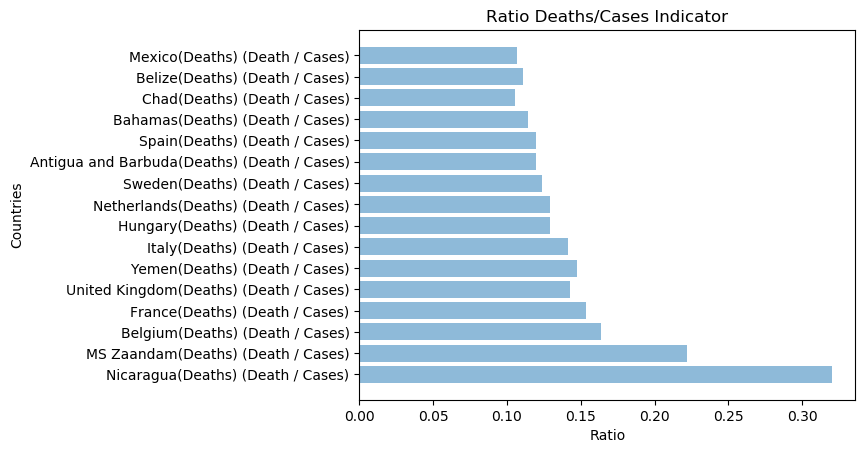

In [402]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = xd.index
y_pos = np.arange(len(objects))                   
performance = xd.values.ravel()

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Ratio')
plt.title('Ratio Deaths/Cases Indicator')
plt.ylabel('Countries')

plt.show()

In [379]:
growth_analysis = growth_deaths_cases_relation.pct_change().iloc[-6:-1].mean().replace([np.inf, -np.inf], np.nan).dropna()


In [413]:
c = growth_analysis.nlargest(10)
c

Equatorial Guinea(Recovered) (Recovered/Cases)        0.057515
Djibouti(Recovered) (Recovered/Cases)                 0.049800
Sao Tome and Principe(Recovered) (Recovered/Cases)    0.045349
Costa Rica(Recovered) (Recovered/Cases)               0.040409
Kenya(Recovered) (Recovered/Cases)                    0.039350
Guinea(Recovered) (Recovered/Cases)                   0.038875
Taiwan*(Recovered) (Recovered/Cases)                  0.033333
Chad(Recovered) (Recovered/Cases)                     0.033076
Ecuador(Recovered) (Recovered/Cases)                  0.028006
Bahrain(Recovered) (Recovered/Cases)                  0.026701
dtype: float64

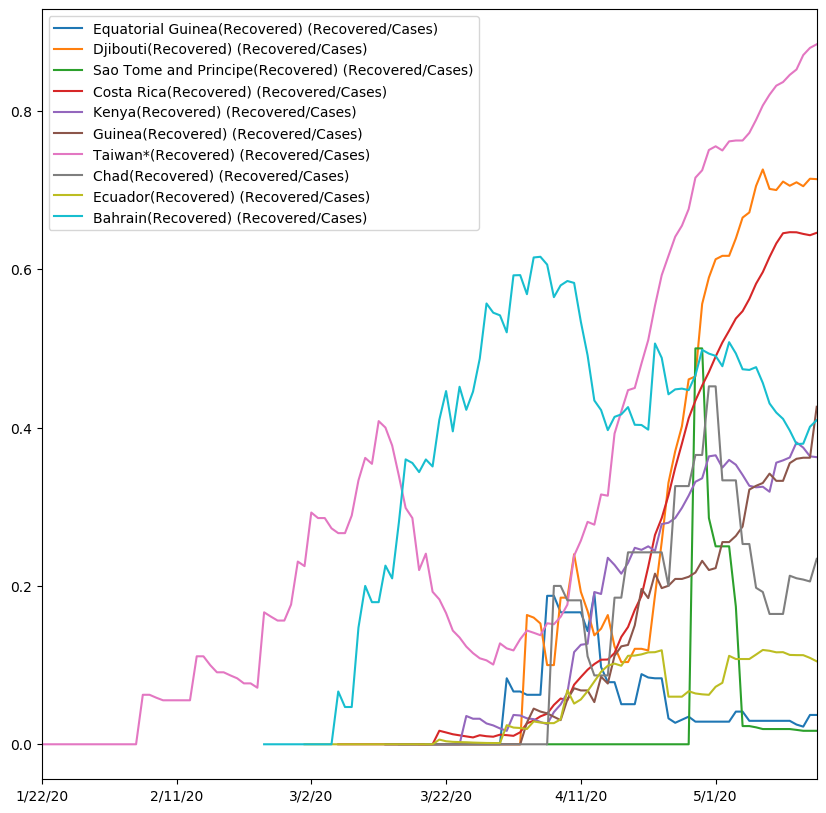

In [419]:
growth_recovereds_cases_relation[c.index].plot(figsize = (10,10))